<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Logo_UTFSM.png/250px-Logo_UTFSM.png style="float:right;height:90px">
<img src=http://carla2014.ccarla.org/img/logo_DI_UTFSM.jpg style="float:left;height:90px">
<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Actividad 2 </h2> 
</center>

<center>    
    Roberto Felipe Fuentes Zenteno - `roberto.fuentes@alumnos.usm.cl`.
</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [2]:
# first we load the data:
data = np.load("orion.npy")
data_copy = data = np.load("orion.npy")

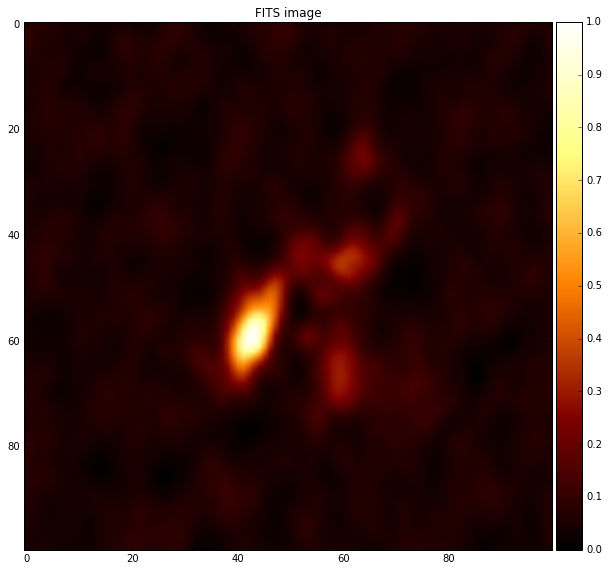

In [3]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

## Respuesta:

In [4]:
def RMS(data):
    factor = 1/(data.shape[0]*data.shape[1])
    suma = ((data**2).sum(axis=1)).sum()
    return np.sqrt(factor*suma)

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

## Respuesta:

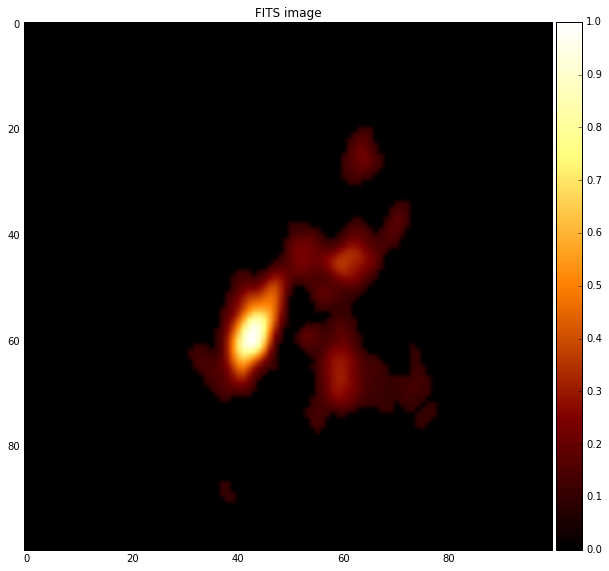

In [5]:
#Creamos una mascara donde todos los valores que sean mayores a nuestro factor RMS sean verdaderos, y los demas sean False
mask = data > RMS(data)
#multiplicamos ambas matrices haciendo operaciones element wise, ya que True mantendra el mismo valor, mientras que False hara los valores 0.
intensidad = mask*data
#Finalmente mostramos la imagen resultante.
image_plot(intensidad)

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

## Respuesta:

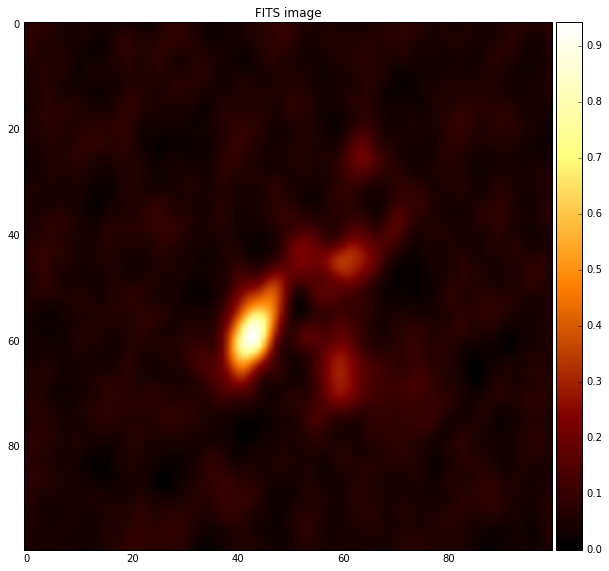

In [6]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])

def apply_filter(data,mask,kernel_filter):
    #Vemos los indices donde la mascara sea 1, ya que estos seran los valores donde aplicaremos el filtro. 
    modify_values = np.where(mask==1)
    for i in range(len(modify_values[0])):
        #Recorremos este arreglo y definimos sub_matrix, que sera la matriz de 3x3 con centro el valor distinto de 0.
        sub_matrix = data[modify_values[0][i]-1:modify_values[0][i]+2,modify_values[1][i]-1:modify_values[1][i]+2]
        #vectorizamos el kernel_filter y nuestra sub_matriz, las multiplicamos mediante element wise y sumamos todos los valores,
        #remplazando el valor de data en esos indices.
        data[modify_values[0][i],modify_values[1][i]] = (kernel_filter.ravel() * sub_matrix.ravel()).sum()
    return None

#mostramos la imagen con el filtro correspondiente
apply_filter(data,mask,kernel_filter) 
image_plot(data)

Cabe destacara que a medida que aplicamos mas veces el filtro, la imagen va siendo cada vez mas "brillosa". 

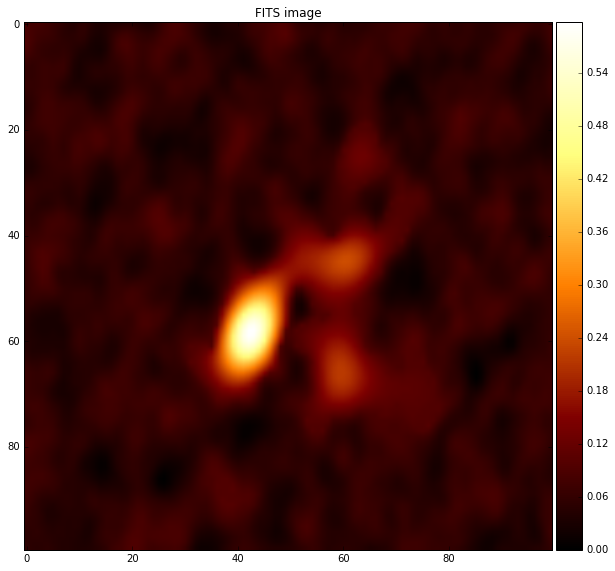

In [7]:
for i in range(10):
    apply_filter(data,mask,kernel_filter) 
image_plot(data)